# Demo 1: Compute a PSF with correction factors and arbitrary phase aberrations

To compute a PSF with a chosen propagator (model) and given parameters, we start by importing the propagators.

In [1]:
import math
from psf_generator.propagators import *
from psf_generator.utils.plots import plot_pupil, plot_psf

## Example 1: compute a plain PSF under high NA
We showcase it with `VectorialSphericalPropagator`.

For convenience, we can group all the parameters into a dictionary `kwargs`.
Note that all the input arguments of any propagator have a default value, refer to ADD LINK for them.
You can freely assign a new value to any one of them.

For example, here we choose a high NA of 1.3, length of the field of view to be 2000 nm, defocus range below and above the focal plane along the $z$-axis to be each 4000 nm, in 300 slices in total, and circular polarization, i.e., the polarization vector $(e_0^x, e_0^y) = (\frac{\sqrt(2)}{2}, \frac{\sqrt(2)}{2}\mathrm{j})$.

In [2]:
kwargs = {
    'n_pix_pupil': 127,
    'n_pix_psf': 256,
    'na': 1.3,
    'wavelength': 600,
    'fov': 2000,
    'defocus_min': -4000,
    'defocus_max': 4000,
    'n_defocus': 300,
    'e0x': math.sqrt(2) / 2,
    'e0y': math.sqrt(2) / 2 * 1j,
}
my_propagator = VectorialSphericalPropagator(**kwargs)

We obtain the 3D PSF via the method `compute_focus_field()`.

In [3]:
psf = my_propagator.compute_focus_field()

To visualize some key properties of the PSF which is complex-valued, such as the modulus, phase and intensity, use the function `plot_psf`.
Since the PSF is 3D, for the modulus and the phase, only three orthogonal slices (focal plane $xy$, $xz$, and $yz$) through the center of the image for each component of the electric field ($\mathbf{e}_x$, $\mathbf{e}_y$, $\mathbf{e}_z$) are shown.
The intensity $I$ and the amplitude $A$ of the PSF are defined as
$$I = \sum_{i=1}^{N} |\mathbf{e}_i(x, y, z)|^2, \quad N = 1 \, \mathrm{or} \, 3. \qquad A=\sqrt{I}.$$
$N=1$ for scalar and $3$ for vectorial propagators.


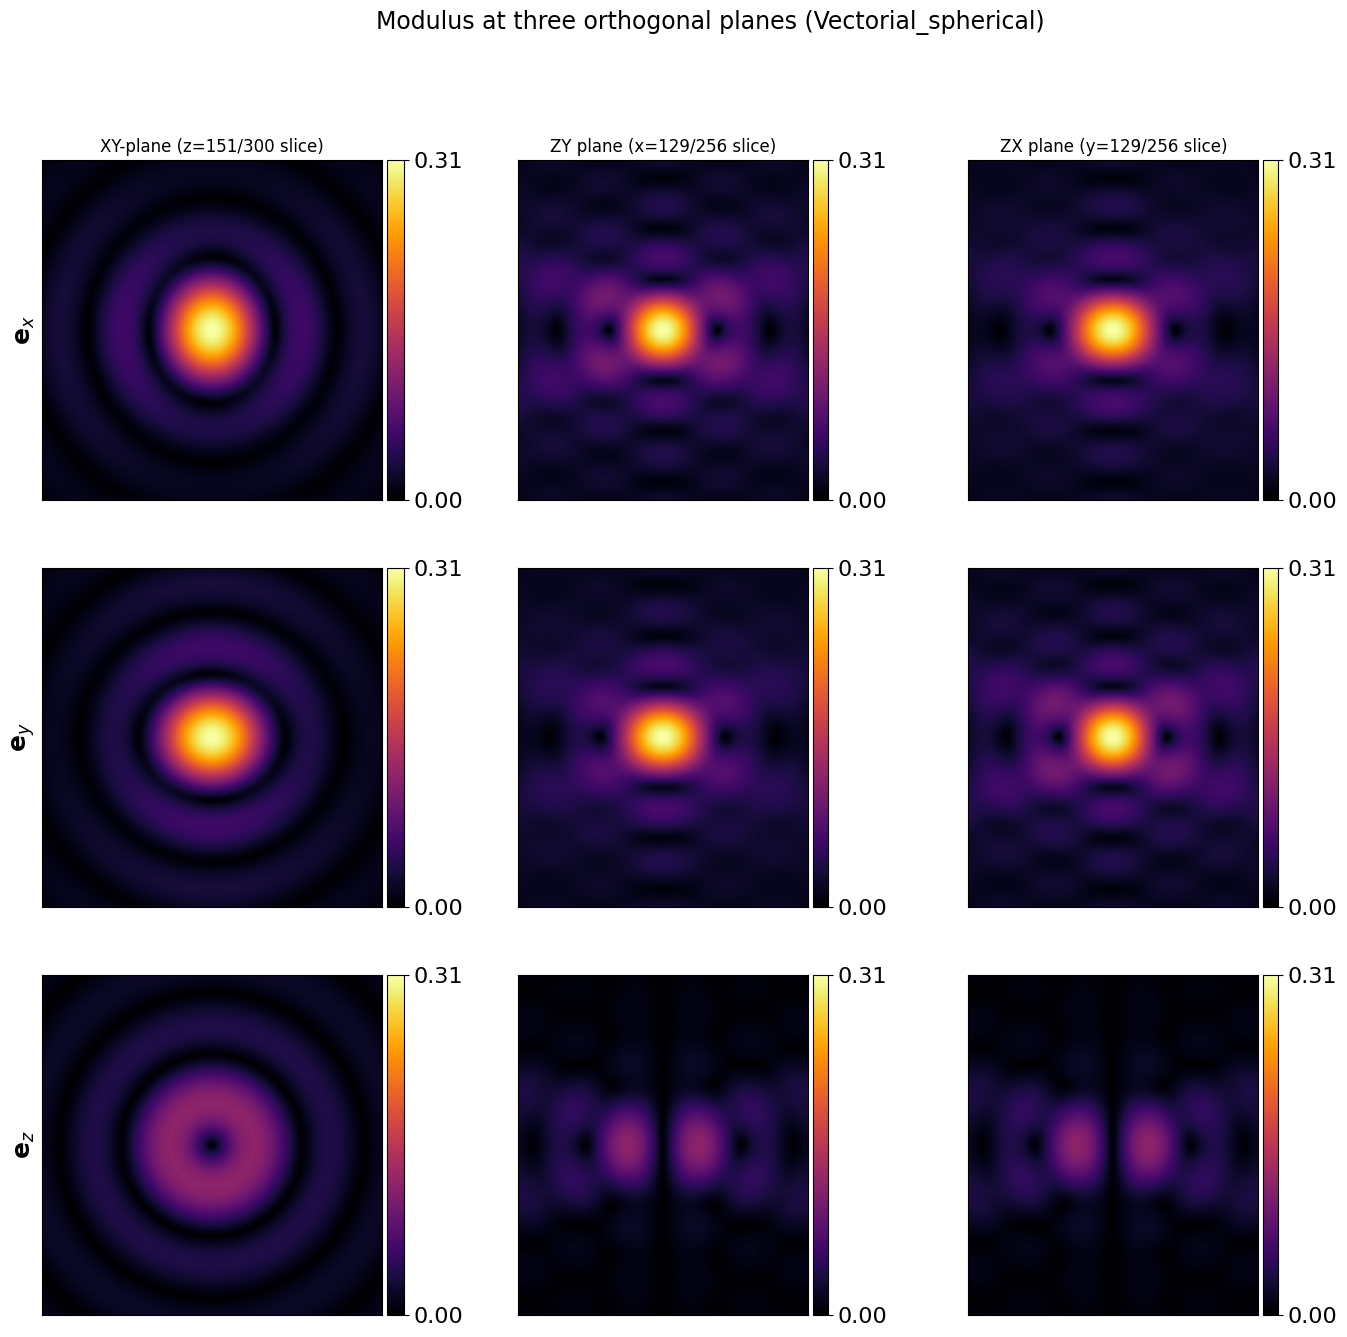

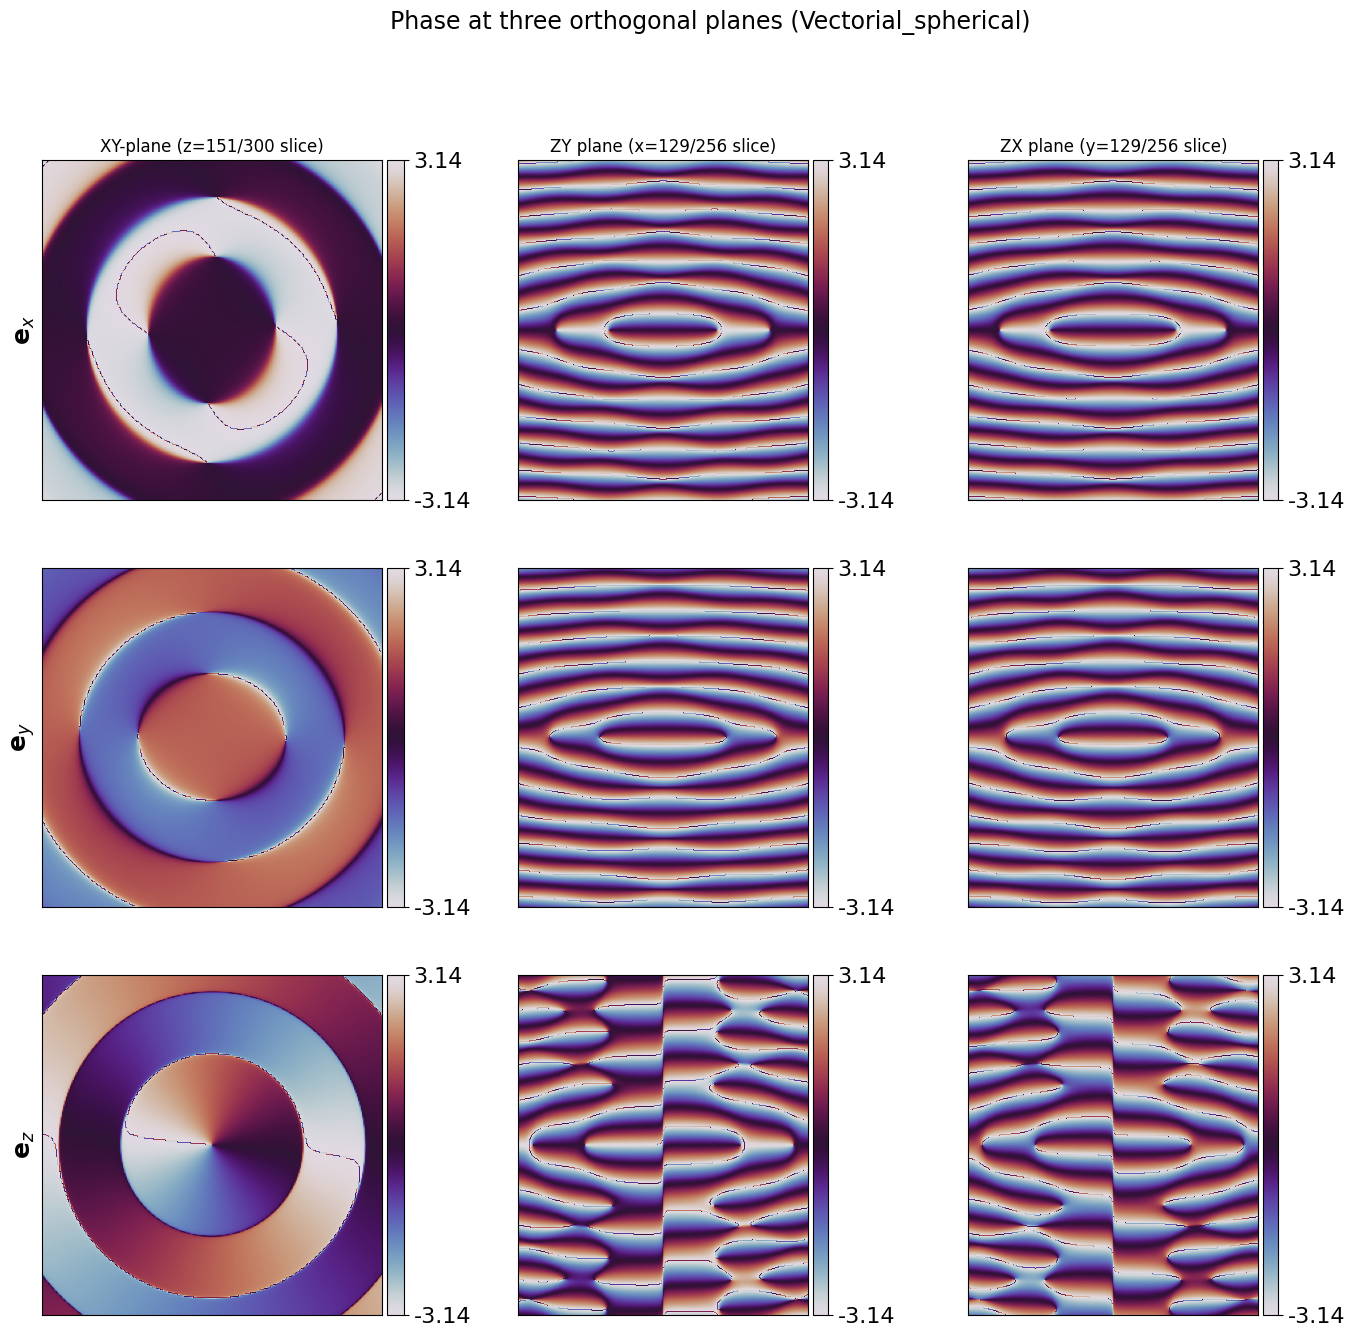

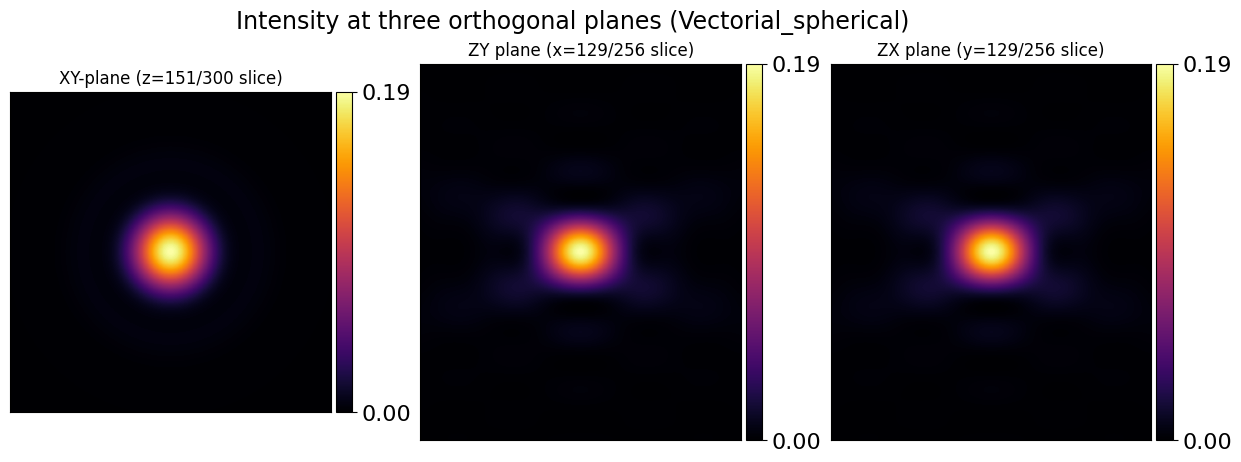

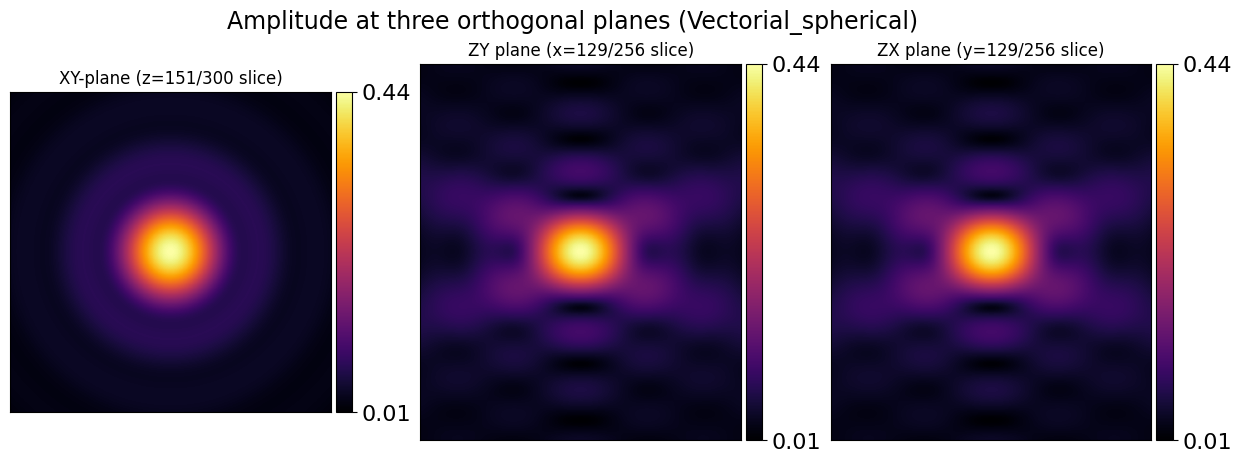

In [4]:
# visualize the modulus, phase, intensity and amplitude of the PSF
for quantity in ['modulus', 'phase', 'intensity', 'amplitude']:
    plot_psf(psf=psf, name_of_propagator=my_propagator.get_name(), quantity=quantity, show_titles=True, show_cbar_ticks=True)

## Example 2: apply the Gibson-Lanni and apodization correction factors to a Cartesian propagator
The Gibson-Lanni correction factor accounts for the refractive index mismatch between different layers.
The apodization factor ensures energy conservation and is particularly important in high-NA systems.
They both have been applied to the spherical case in existing works, we show that they are equally applicable to the Cartesian case.

In [5]:
kwargs_2 = {
    'n_pix_pupil': 257,
    'n_pix_psf': 256,
    'na': 1.3,
    'wavelength': 632,
    'fov': 2000,
    'defocus_min': -4000,
    'defocus_max': 4000,
    'n_defocus': 300,
    'e0x': math.sqrt(2) / 2,
    'e0y': math.sqrt(2) / 2 * 1j,
    'apod_factor': True,
    'gibson_lanni': True
}
my_propagator_2 = VectorialCartesianPropagator(**kwargs_2)
psf_2 = my_propagator_2.compute_focus_field()

We check the modulus of the resulting PSF.

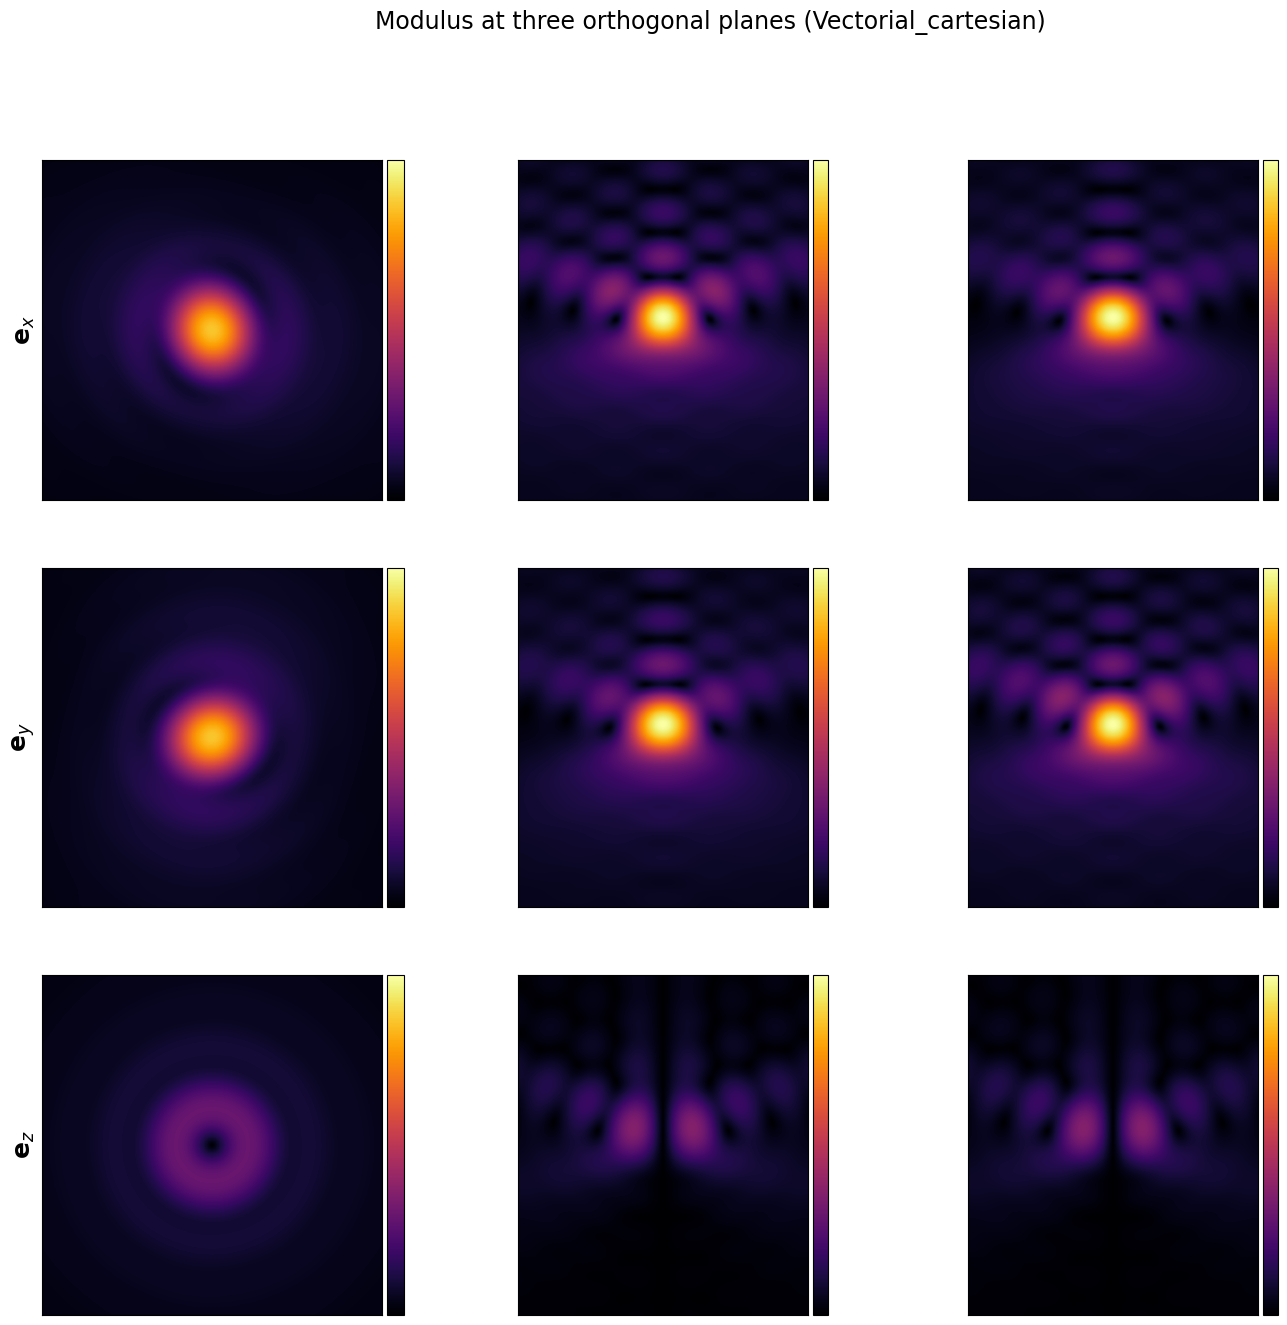

In [6]:
plot_psf(psf=psf_2, name_of_propagator=my_propagator_2.get_name(), quantity='modulus')

It is also possible to check the pupil to inspect the applied aberrations via the method `get_pupil()`.
 The function `plot_pupil` will show both the modulus and the phase of the pupil.


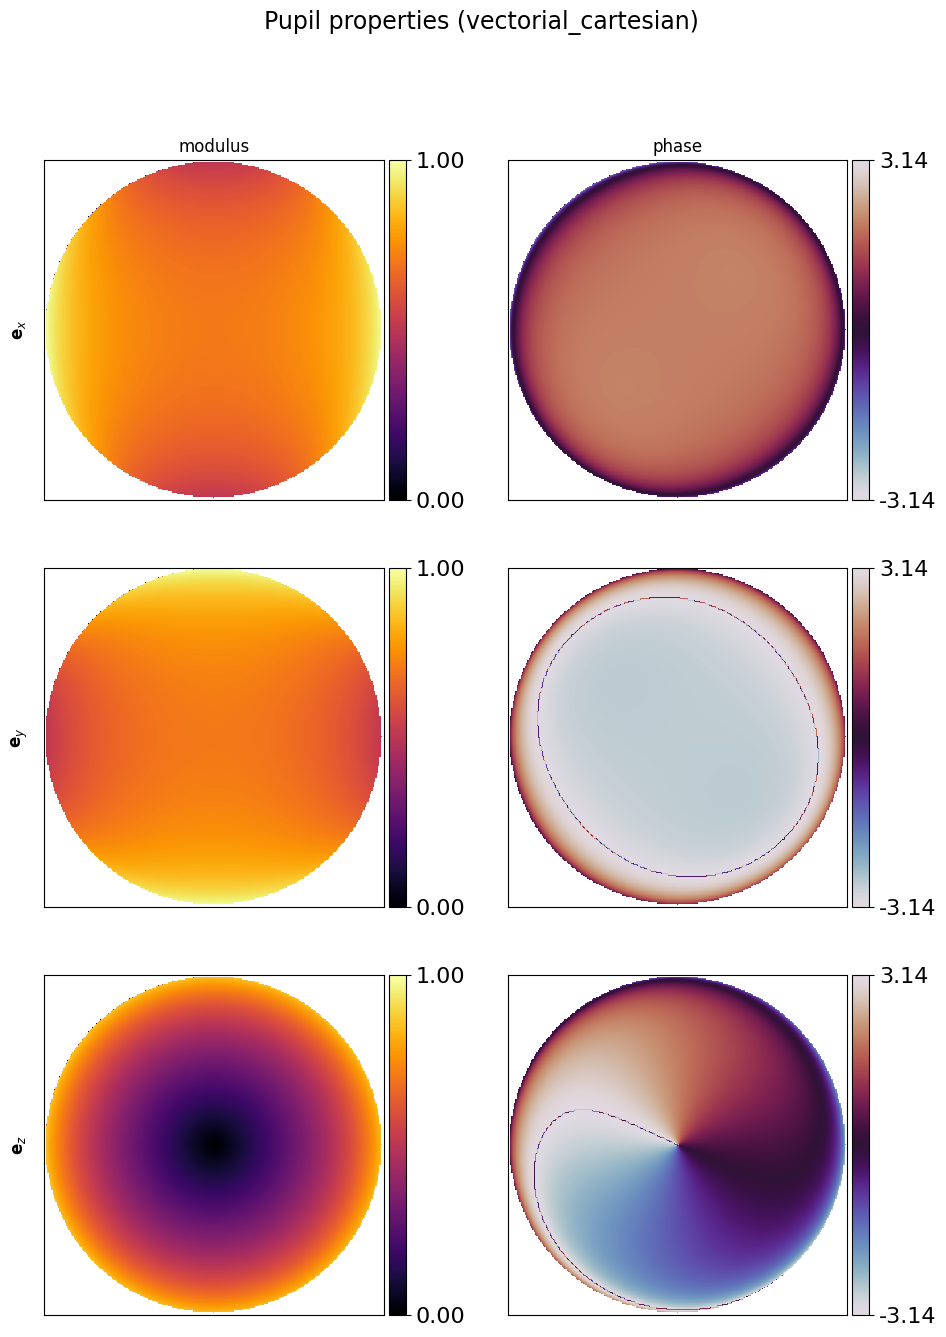

In [7]:
# compute pupil
pupil = my_propagator_2.get_pupil()
plot_pupil(pupil=pupil, name_of_propagator=my_propagator_2.get_name(), show_cbar_ticks=True)

**Note**: In the case of spherical propagators, the pupil is not a 2D image (but two 1D intervals) thus not available for display. Use the corresponding Cartesian propagator to compute and visualize the equivalent pupil instead.

## Example 3: arbitrary phase aberrations
More general phase aberrations can be introduced for applications such as PSF engineering and wavefront shaping.
We give two examples
- the "donut" excitation beam (corresponding phase mask `'vortex'`) used in STED or MINFLUX microscopy,
- astigmatism via the Zernike polynomials.

Note that we have to use the Cartesian propagators here because arbitrary aberrations may not be axisymmetric, which is the assumption of the spherical propagators.

### Donut
We only need to specify the `special_phase_mask` to be `'vortex'`.

In [8]:
kwargs_3 = {
    'n_pix_pupil': 257,
    'n_pix_psf': 256,
    'na': 1.3,
    'wavelength': 600,
    'fov': 2000,
    'defocus_min': -4000,
    'defocus_max': 4000,
    'n_defocus': 300,
    'e0x': math.sqrt(2) / 2,
    'e0y': math.sqrt(2) / 2 * 1j,
    'special_phase_mask': 'vortex'
}
my_propagator_3 = VectorialCartesianPropagator(**kwargs_3)
psf_3 = my_propagator_3.compute_focus_field()
pupil_3 = my_propagator_3.get_pupil()

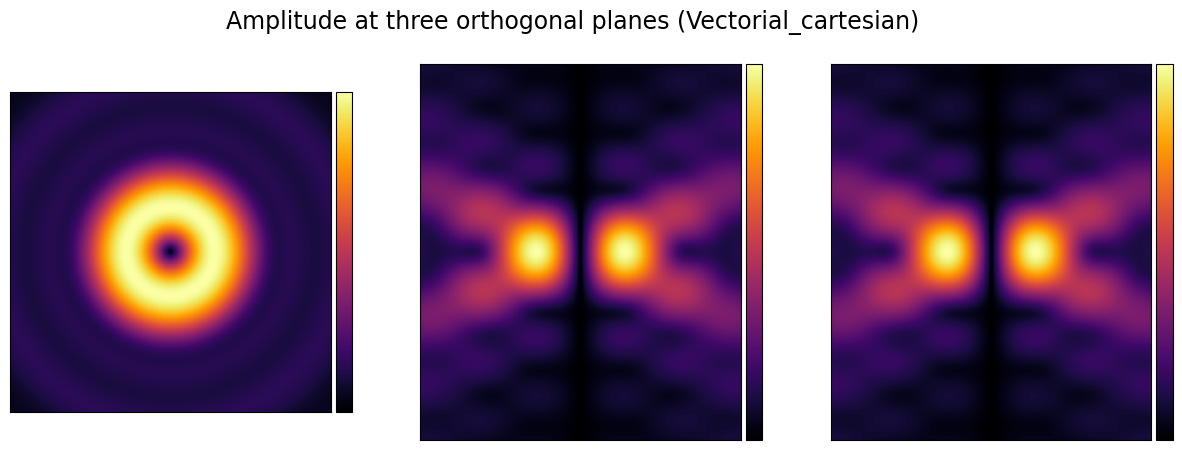

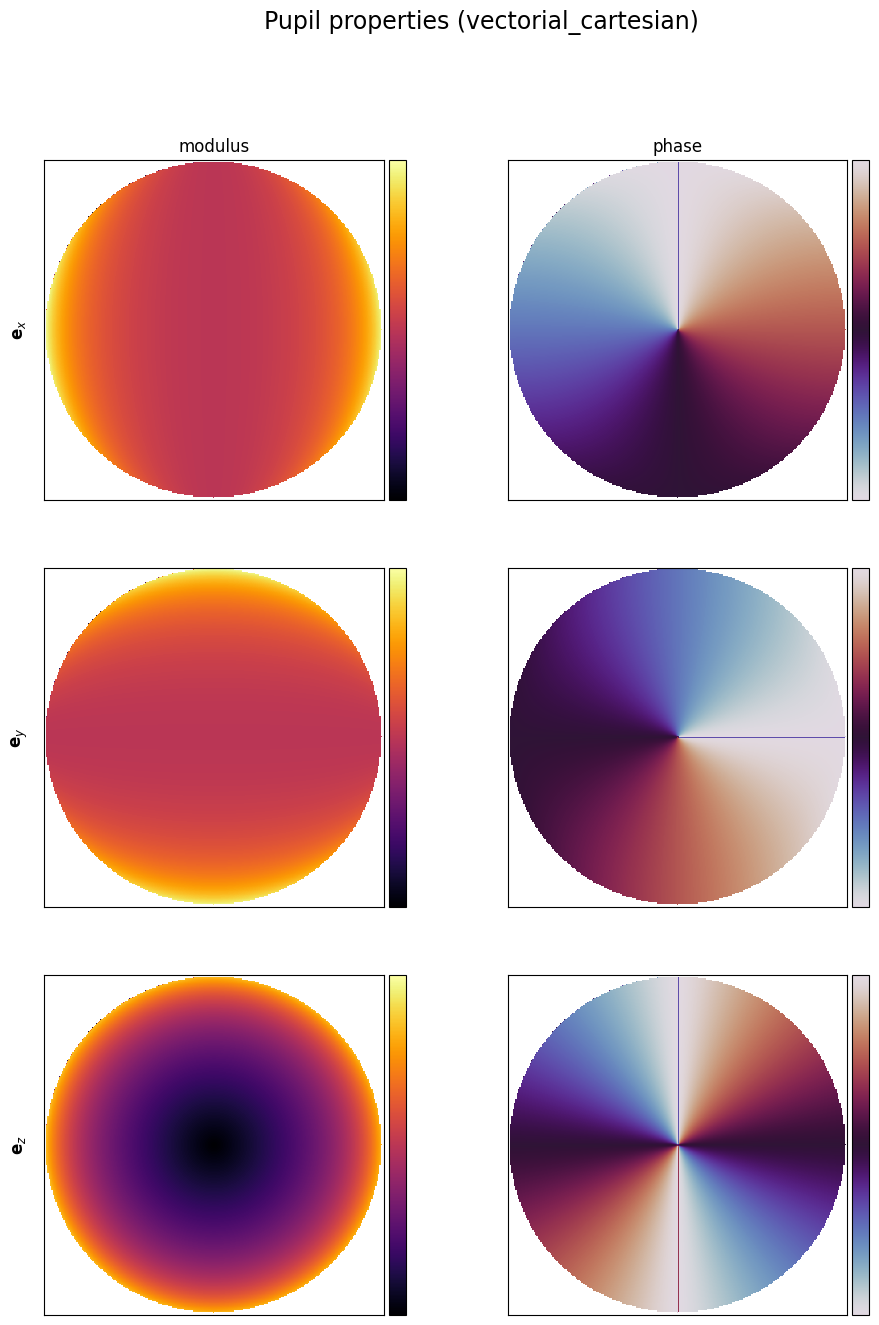

In [9]:
plot_psf(psf=psf_3, name_of_propagator=my_propagator_3.get_name(), quantity='amplitude')
plot_pupil(pupil_3, name_of_propagator=my_propagator_3.get_name())

### Astigmatism
We enable the Zernike polynomial for astigmatism by specifying the coefficient for it to be nonzero.

In [10]:
kwargs_4 = {
    'n_pix_pupil': 257,
    'n_pix_psf': 256,
    'na': 1.3,
    'wavelength': 632,
    'fov': 2000,
    'defocus_min': -500,
    'defocus_max': 500,
    'n_defocus': 300,
    'e0x': math.sqrt(2) / 2,
    'e0y': math.sqrt(2) / 2 * 1j,
    'zernike_coefficients': [0, 0, 0, 0, 0, 1]
}
my_propagator_4 = VectorialCartesianPropagator(**kwargs_4)
psf_4 = my_propagator_4.compute_focus_field()
pupil_4 = my_propagator_4.get_pupil()

We can plot multiple $xy$ planes to see the effect of astigmatism along the optical ($z$) axis.

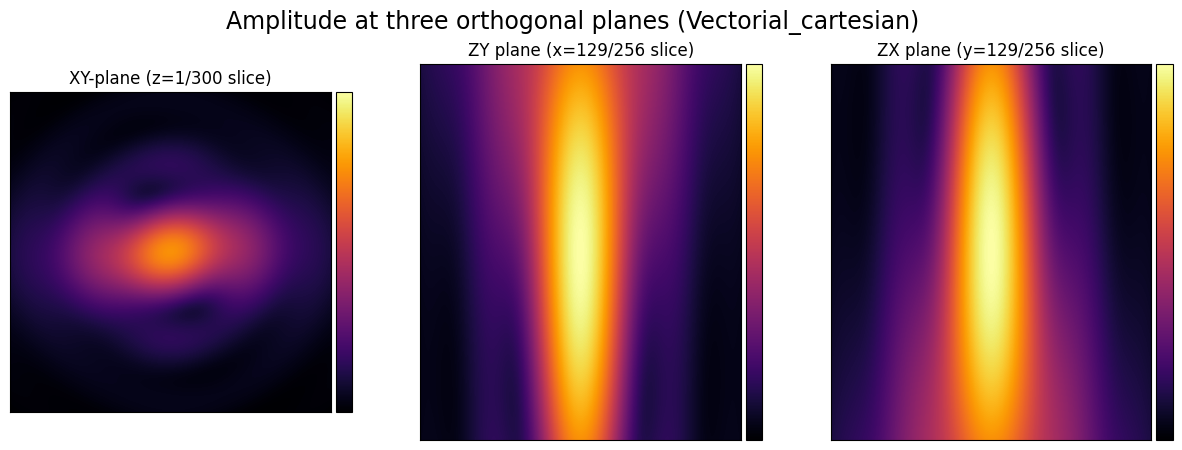

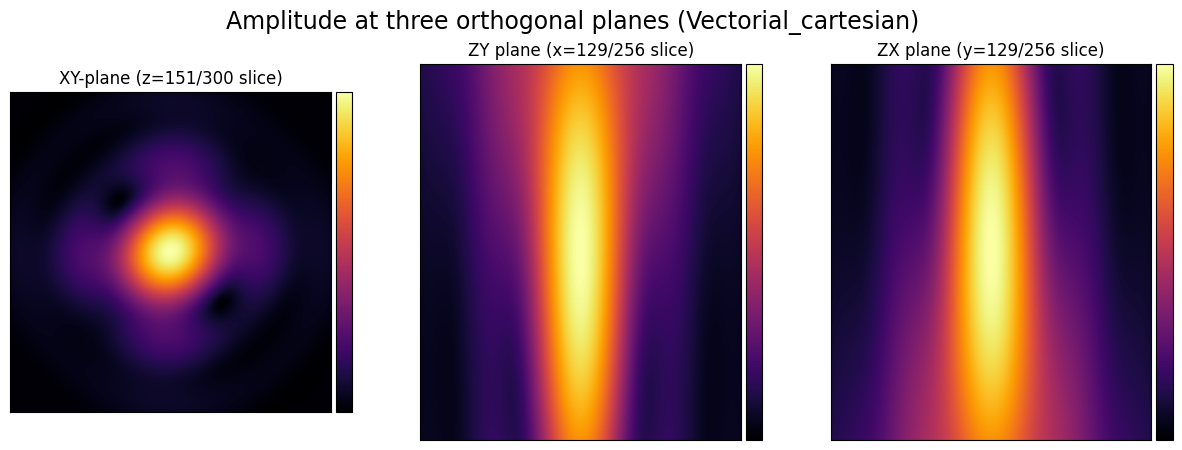

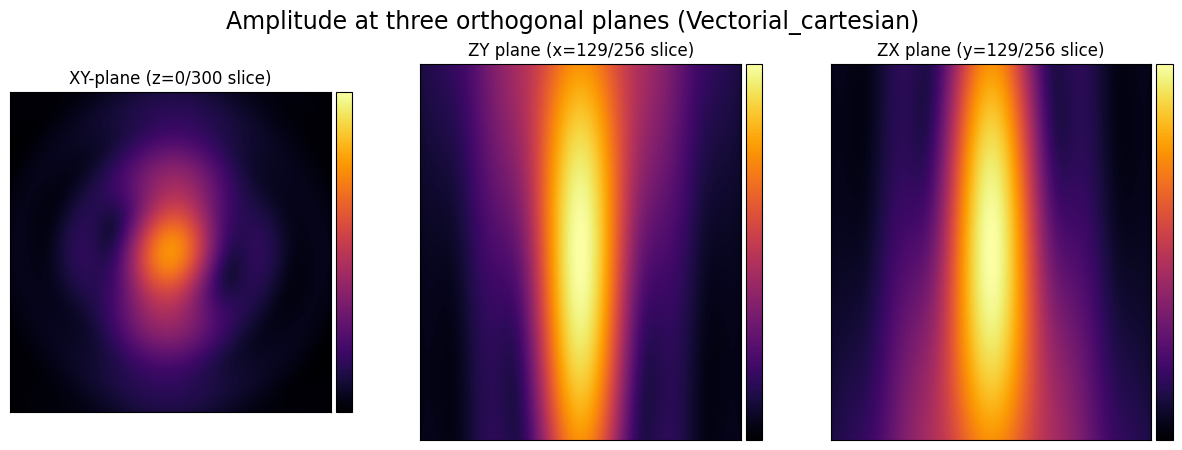

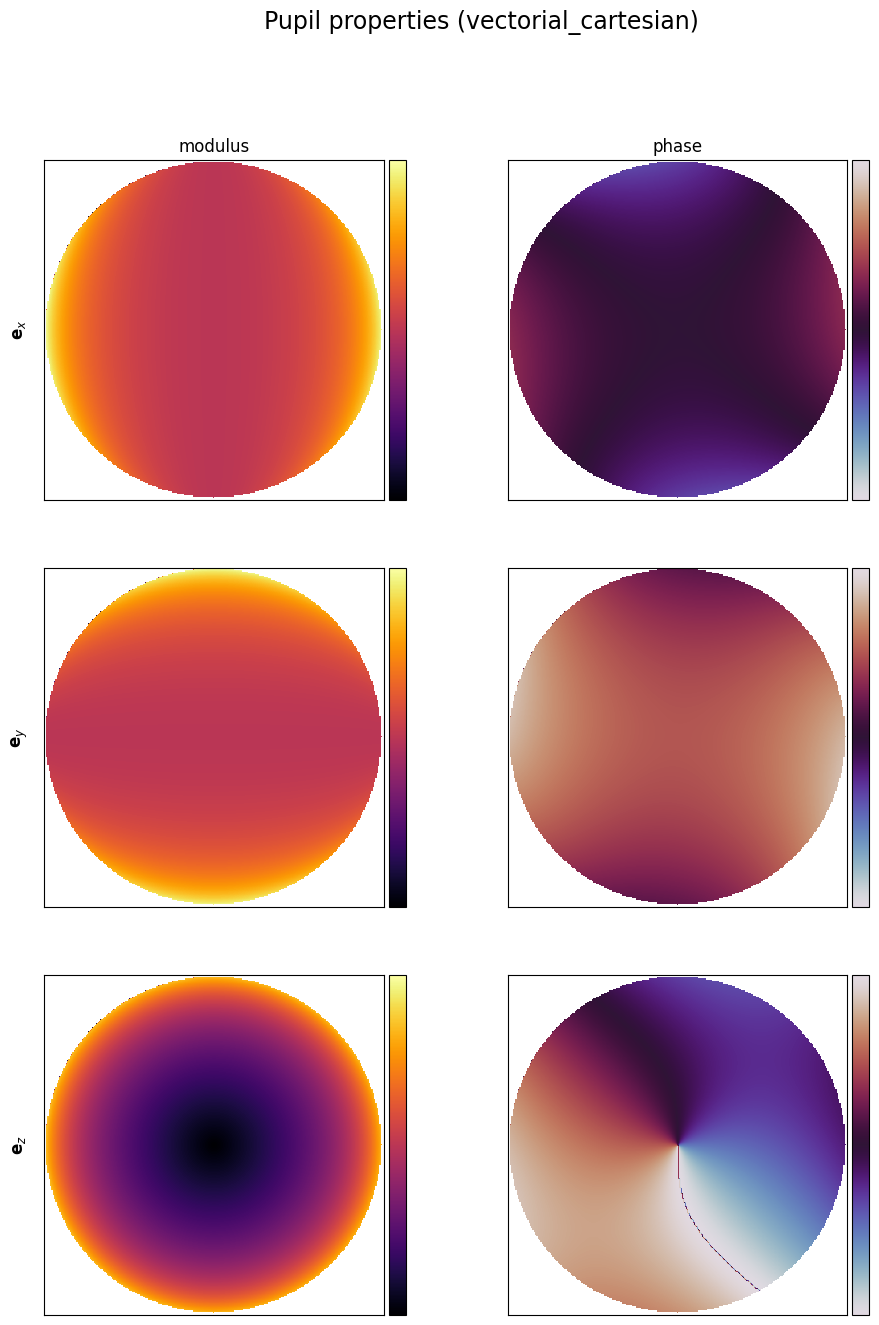

In [11]:
central_slice_n = kwargs_4['n_defocus'] // 2
for slice_n in [0, central_slice_n, -1]:
    plot_psf(psf=psf_4, name_of_propagator=my_propagator_4.get_name(), quantity='amplitude', show_titles=True, z_slice_number=slice_n)
plot_pupil(pupil_4, name_of_propagator=my_propagator_4.get_name())